In [416]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, sys
import scipy.stats as st
from response import response_legacy

In [214]:
x = np.array([np.random.normal(loc=0.2, scale=0.04) for _ in range(1000)])

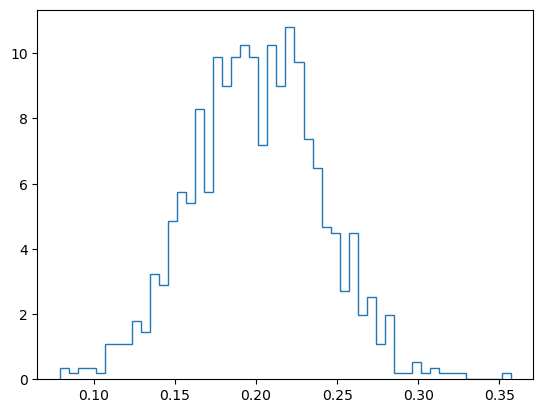

In [215]:
plt.hist(x, bins=50, histtype='step', density=True)
plt.show()

In [417]:
def Multivariate_Gaussian_Estimation(data=None, n_samples=None):
    columns = []
    is_df = False
    if data is None:
        return None
    elif isinstance(data, pd.DataFrame):
        columns = data.columns
        is_df = True
        data = data.to_numpy()
    dim = np.array(data).shape[1] # dimension of the data
    # covariance matrix of the data
    cov = np.cov(data.T)
    # mean of the data
    mean = np.mean(data, axis=0)
    # add small perturbation to the covariance matrix
    cov_perturbed = cov + 1e-4*np.identity(dim)
    # calculate the Cholesky decomposition : triangularize the covariance matrix
    L = np.linalg.cholesky(cov_perturbed)    
    # generate a new random sample, independent from the data
    rndn = np.random.normal(loc=0, scale=1, size=(dim,n_samples))
    new_samples = mean.reshape(2,1) + np.dot(L, rndn)
    if is_df:
        new_samples = pd.DataFrame(new_samples.T, columns=columns)
    return new_samples

def kernel_func(x, xi, bw):
    """
        bw: bandwidth
    """
    c1 = 1/(bw*np.sqrt(2*np.pi))
    c2 = np.exp(-0.5*np.power((x-xi)/(bw), 2))
    return c1 * c2

def Kernel_Density_Estimation(x=None, data=None, bw=0.1):
    if (data is None) or (x is None):
        return None
    # 1D case
    out = 0
    N = len(data)
    for i in range(N):
        out += kernel_func(x=x, xi=data[i], bw=bw)
    out = out/N
    return out

class KernelDensityEstimation:
    def __init__(self, data=None, kernel_func='gaussian', bw=0.1):
        self.kernel_func = kernel_func
        self.data = data
        self.bandwidth = bw
        self.dim = 2

    def __kernel_func(self, x, xi, bw):
        if self.kernel_func=='gaussian':
            c1 = 1/(bw*np.sqrt(2*np.pi))
            c2 = np.exp(-0.5*np.power((x-xi)/(bw), 2))
            return c1*c2 
            
    def eval_density(self, x):
        out = 0
        N = len(self.data)
        for i in range(N):
            out += self.__kernel_func(x=x, xi=self.data[i], bw=self.bandwidth)
        out = out / N
        return out
    
    def eval_density_2d(self, x, y):
        out = 0
        N = self.data.shape[1]
        for i in range(N):
            out += (self.__kernel_func(x=x, xi=self.data[0][i], bw=self.bandwidth[0]) * self.__kernel_func(x=y, xi=self.data[1][i], bw=self.bandwidth[1]))
        out = out / N
        return out

    def resample(self, N_samples=None):
        if N_samples is None:
            print("Invalid Number of samples.")
            return None
        x_grid = np.linspace(np.min(self.data), np.max(self.data), N_samples)
        new_samples = self.eval_density(x=x_grid)

        return x_grid, new_samples


def PC_rejection():
    """
      This function implements the point cloud distance rejection almost from scratch.
      The idea is to translate the mathematical formulation to computational object/function.
    """
    pass


In [434]:
data = np.concatenate([
    np.random.normal(0, 0.5, 300),
    np.random.exponential(3, 500),
    np.random.normal(loc=10, scale=0.6, size=600)
])
# x_lin = np.linspace(0, 10, 200)
# data = response_legacy(x=x_lin, par=[0, 4000, 2])
kde = KernelDensityEstimation(data=data, kernel_func='gaussian', bw=0.3)
x,y = kde.resample(N_samples=10000)

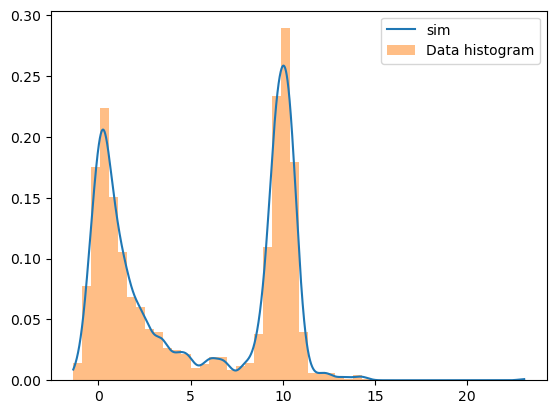

In [435]:
# plt.hist(new_samples, histtype='step', bins=100, density=True, label='sim')
# plt.plot(x_grid, density, label='sim')
plt.plot(x, y, label='sim')
# plt.hist(x, label='data')
plt.hist(data, bins=50, density=True, alpha=0.5, label='Data histogram')
# plt.plot(x_lin,data)
# plt.hist(y, bins=50, density=True, label='sim')
# plt.hist(data[0], density=True, bins=50, alpha=0.5, label='data1')
plt.legend()
plt.show()